In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials import mnist

In [2]:
mnist_data = mnist.input_data.read_data_sets('MNIST/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_images = mnist_data.train
test_images = mnist_data.test

In [4]:
train_images.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [5]:
import matplotlib.pyplot as plt

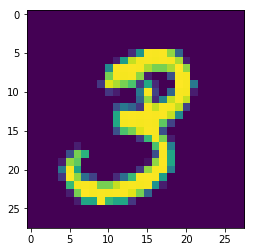

In [6]:
plt.imshow(train_images.images[1].reshape(28,28))

In [7]:
train_data = train_images.images
train_labels = train_images.labels

test_data = test_images.images
test_labels = test_images.labels

In [8]:
def initWeight(shape):
    w = tf.Variable(tf.random_normal(shape))
    return w

def initBias(shape):
    b = tf.constant(0.1,shape=shape)
    return tf.Variable(b)

def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding='SAME')

def maxPooling(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

def convLayer(input,shape):
    w = initWeight(shape)
    b = initBias([shape[3]])
    return tf.nn.relu(conv2d(input,w) + b)

def fullyConnected(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    weights = initWeight((input_size,size))
    bias = initBias([size])
    return tf.matmul(input_layer,weights) + bias

In [21]:
x = tf.placeholder(tf.float32,shape=(None,784))
y = tf.placeholder(tf.float32, shape=(None,10))

In [22]:
input_images = tf.reshape(x,(-1,28,28,1))

In [23]:
input_images

<tf.Tensor 'Reshape_2:0' shape=(?, 28, 28, 1) dtype=float32>

In [24]:
conv1 = convLayer(input_images,[6,6,1,32])
conv1_maxPooled = maxPooling(conv1)

In [25]:
conv2 = convLayer(conv1_maxPooled,[6,6,32,64])
conv2_maxPooled = maxPooling(conv2)

In [26]:
conv2_flatten = tf.reshape(conv2_maxPooled, [-1,7*7*64])
conv2_flatten = tf.nn.relu(fullyConnected(conv2_flatten,1024))

In [27]:
y_pred = fullyConnected(conv2_flatten,10)

In [28]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=y_pred))

In [29]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [30]:
init = tf.global_variables_initializer()

In [31]:
epoch = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        batch_x, batch_y = mnist_data.train.next_batch(50)
        sess.run(train,feed_dict={x:batch_x,y:batch_y})
        
        if i%100 == 0:
            print("Currently on step : {}".format(i))
            print("Accuracy is :")
#             now compare indexs of y_prediction and y_actual...whether they have same value or not
            matches = tf.equal(tf.arg_max(y_pred,1), tf.arg_max(y,1))
#             now matches gives result as true and false
#             convert true and false to 1 and 0 and compute accuracy
            accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
#             Now to test the accuracy we pass test data to x and y
            print(sess.run(accuracy, feed_dict = {x:mnist_data.test.images,y:mnist_data.test.labels}))
            print("------------")

Currently on step : 0
Accuracy is :
0.1068
------------
Currently on step : 100
Accuracy is :
0.7557
------------
Currently on step : 200
Accuracy is :
0.8153
------------
Currently on step : 300
Accuracy is :
0.8493
------------
Currently on step : 400
Accuracy is :
0.8517
------------
Currently on step : 500
Accuracy is :
0.8713
------------
Currently on step : 600
Accuracy is :
0.8669
------------
Currently on step : 700
Accuracy is :
0.8833
------------
Currently on step : 800
Accuracy is :
0.8891
------------
Currently on step : 900
Accuracy is :
0.8952
------------
